In [1]:
import pandas as pd
import bs4
import urllib2
from matplotlib import pyplot as plt, cm
from itertools import islice, cycle
import matplotlib as mpl
import scipy
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
presidents = {
    32:'Franklin D. Roosevelt',
    33:'Harry S. Truman',
    34:'Dwight D. Eisenhower',
    35:'John F. Kennedy',
    36:'Lyndon B. Johnson',
    37:'Richard Nixon',
    38:'Gerald R. Ford',
    39:'Jimmy Carter',
    40:'Ronald Reagan',
    41:'George Bush',
    42:'William J. Clinton',
    43:'George W. Bush',
    44:'Barack Obama'
}

In [3]:
df = pd.DataFrame()
for i in presidents.keys():
    url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={0}&sort=time&direct=DESC&Submit=DISPLAY'.format(i)
    soup = bs4.BeautifulSoup(urllib2.urlopen(url).read())
    df = df.append(pd.DataFrame([[presidents[i]]+[j.text for j in k.findAll('td')[1:]] for k in soup.find('table',width="600").findAll('tr')[6:]]))
df.columns = ['President','Start Date','End Date','','Approving','Disapproving','Unsure']
df = df.reset_index().drop(['','index'],1)
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])
df[['Approving','Disapproving','Unsure']] = df[['Approving','Disapproving','Unsure']].astype(int)

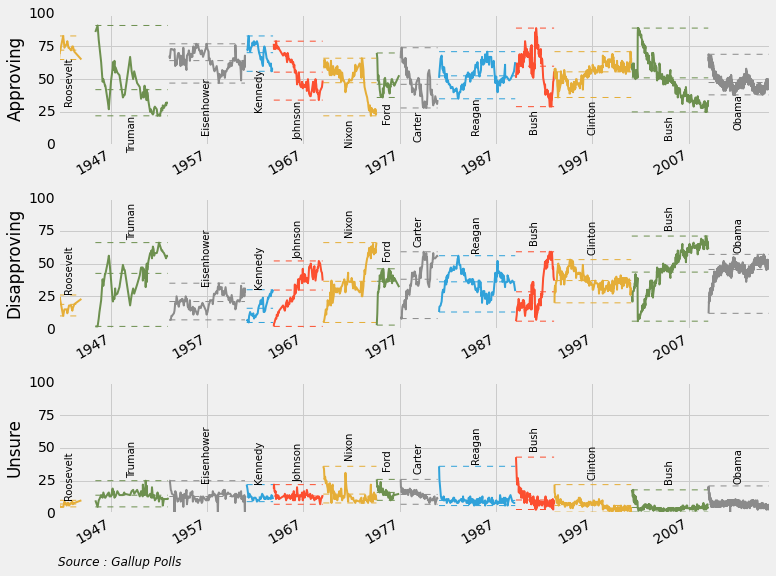

In [4]:
fig,ax = plt.subplots(figsize=(11,8),nrows=3,ncols=1)
states = ['Approving','Disapproving','Unsure']
color_list = list(islice(cycle(['#e5ae38', '#6d904f', '#8b8b8b','#30a2da', '#fc4f30']), None, len(df.drop_duplicates(subset='Start Date'))))
for t in range(3):
    df_wide = df.drop([x for x in ['End Date','Approving','Disapproving','Unsure'] if x!=states[t]],1).drop_duplicates(subset='Start Date').pivot(index='Start Date',columns='President',values=states[t])[presidents.values()]; df_wide.index.name=None    
    fig = (df_wide*0+df_wide.max()).plot(ax=ax[t],legend=False,style='--',linewidth=1,color=color_list)
    fig = (df_wide*0+df_wide.min()).plot(ax=ax[t],legend=False,style='--',linewidth=1,color=color_list)
    fig = (df_wide*0+df_wide.mean()).plot(ax=ax[t],legend=False,style='--',linewidth=1,color=color_list)
    fig = df_wide.plot(ax=ax[t],ylim=[0,100],legend=False,linewidth=2,color=color_list)
    fig = ax[t].set_ylabel(states[t])
    for k in presidents.values():
        if t==0:
            fig = ax[t].text(pd.datetools.datetime.fromordinal((df_wide[k].dropna().index[0].toordinal()+df_wide[k].dropna().index[-1].toordinal())/2), df_wide[k].min()-len(k.split()[-1])-8, k.split()[-1], ha="center", va="center", rotation=90,size=10)
        else:
            fig = ax[t].text(pd.datetools.datetime.fromordinal((df_wide[k].dropna().index[0].toordinal()+df_wide[k].dropna().index[-1].toordinal())/2), df_wide[k].max()+len(k.split()[-1])+10, k.split()[-1], ha="center", va="center", rotation=90,size=10)
    ax[t].set_yticks(scipy.arange(0,100.1,25))
ax[2].text(df_wide.index[0],-40,'Source : Gallup Polls',style='italic',fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.95)